In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [14]:
data_folder = './data/'

In [15]:
import pandas as pd

In [16]:
ds = pd.read_csv(data_folder + 'olympics_100m.csv', sep=',')

#Splitting traing/test
training = ds[0:len(ds)-2]
testing=ds[-2:]

In [17]:
#Let's use the notation from the lecture
X = training.loc[:,'Year'].values
y = training.loc[:, 'Time'].values
X = X.reshape(len(training),1)

X_test = testing.loc[:,'Year'].values
y_test = testing.loc[:, 'Time'].values
X_test = X_test.reshape(len(testing),1)

In [18]:
from ridge import RidgeRegression

In [19]:
X = np.array(X).reshape(-1, 1)  # Reshape to be a 2D array
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha = 1 
our_model = RidgeRegression(alpha=alpha)
our_model.fit(X_train, y_train)
predictions = our_model.predict(X_test)

# scikit-learn Ridge Regression model
sklearn_ridge = Ridge(alpha=alpha)
sklearn_ridge.fit(X_train, y_train)
sklearn_predictions = sklearn_ridge.predict(X_test)

# Compare the models using mean squared error
our_model_mse = mean_squared_error(y_test, predictions)
sklearn_mse = mean_squared_error(y_test, sklearn_predictions)

print(f"Our Model's MSE: {our_model_mse}")
print(f"scikit-learn Model MSE: {sklearn_mse}")

# Plotting the results to visualize the fit
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(years, our_model.predict(years.reshape(-1, 1)), color='red', label='Our Model')
plt.plot(years, sklearn_ridge.predict(years.reshape(-1, 1)), color='black', linestyle='--', label='Scikit-learn')
plt.xlabel('Year')
plt.ylabel('Time')
plt.title('Ridge Regression Model Comparisons')
plt.legend()
plt.show()

NameError: name 'np' is not defined

#### Visualization with different values of alpha

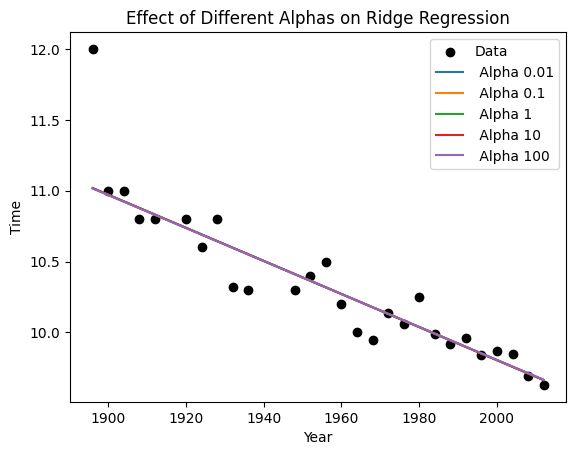

In [57]:
# Choose a range of alpha values to test
alpha_values = [0.01, 0.1, 1, 10, 100]

# Plot the original data
plt.scatter(years, time, color='black', label='Data')

for alpha in alpha_values:
    custom_ridge = RidgeRegression(alpha=alpha)
    custom_ridge.fit(X_train, y_train)
    custom_predictions = custom_ridge.predict(years)

    plt.plot(years, custom_predictions, label=f' Alpha {alpha}')

plt.xlabel('Year')
plt.ylabel('Time')
plt.title('Effect of Different Alphas on Ridge Regression')
plt.legend()
plt.show()


#### References
1. [Regularization Part 1: Ridge (L2) Regression](https://www.youtube.com/watch?v=Q81RR3yKn30&list=TLPQMjQwMTIwMjTjW5is4UUWOg&index=1)
2. [Ridge Regression From Scratch In Python \[Machine Learning Tutorial\]](https://www.youtube.com/watch?v=mpuKSovz9xM&list=TLPQMjQwMTIwMjTjW5is4UUWOg&index=4)